## MBA em Ciência de Dados
# Redes Neurais e Arquiteturas Profundas

### <span style="color:darkred">Módulo III - Arquiteturas de CNNS e treinamento de redes profundas</span>


### <span style="color:darkred">Exercícios com soluções</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

#### <span style="color:red">Recomenda-se fortemente que os exercícios sejam feitos sem consultar as respostas antecipadamente.</span>

---

 ### Exercício 1)

Considere 4 funções de custo distintas: 1. entropia cruzada binária, 2. perda quadrática, vistas em aula, e mais duas adicionais:

3. Perda 0-1

$$\frac{1}{N} \sum_{i=1}^N 
\left\{
	\begin{array}{ll}
		0  & \mbox{if } y_i = \hat{y}_i \\
		1 & \mbox{if } y_i \neq \hat{y}_i 
	\end{array}
\right.$$

4. Perda SVM/Hinge
 
$$\frac{1}{N} \sum_{i=1}^N \max(0, 1- y^{h}_i\cdot f(x_i)),$$
essa função considera que as classes são -1 e 1, sendo $f(x_i)=\hat{y}_i^{h}$ um valor de saída considerando valores negativos (os quais gerarão classificação para a classe -1) e positivos (classificação para a classe 1). Portanto será preciso adaptar as classes do problema e a  saída $\hat{y}^{h}$ para esse cenário da seguinte forma:
* $y^{h} \in \{-1,1\}$, e
* $\hat{y}^{h} = 2\cdot(\hat{y}-0.5)$,
sendo $\hat{y}$ a probabilidade de uma instância pertencer à classe positiva (1).

Considere o exemplo dado em aula, com os pontos unidimensionais conforme o código abaixo.

A seguir, treine um classificador de Regressão Logística com solver `lbfgs` e compute as quatro perdas nesse conjunto de dados após o treinamento. Note que as perdas 1,2 e 4 são calculadas com base nas probabilidades, enquanto que 3 é calculada com base na classificação.

Imprima as perdas por instância para inspeção e logo após a perda média no conjunto de treinamento. Qual a ordem de magnitude das perdas, da menor para a maior?

(a) Hinge, Quadrática, Entropia Cruzada, 0-1<br>
(b) Quadrática, Entropia Cruzada, Hinge e 0-1<br>
(c) 0-1, Quadrática, Entropia Cruzada, Hinge<br>
(d) Quadrática, 0-1, Entropia Cruzada, Hinge</font><br>

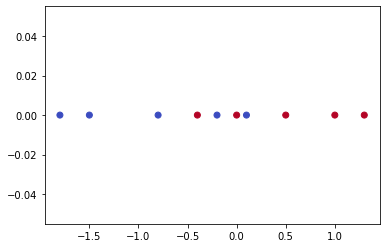

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([-1.8,-1.5,-0.8,-0.4,-0.2, 0.0, 0.1, 0.5, 1.0, 1.3])
y = np.array([ 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,  1.0, 1.0, 1.0])
yh = np.array([ -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0])

plt.scatter(x,np.zeros(10), c=y,cmap=plt.cm.coolwarm)

In [1]:
from sklearn.linear_model import LogisticRegression


---

### Exercício 2)

Considere as funções de custo vistas em aula e estudadas no exercício anterior: Perda Quadrática (MSE), Erro Absoluto (MAE), Perda 0-1, Perda Hinge/SVM, Entropia Cruzada. Como escolher uma função para realizar o treinamento de uma rede neural?

(a) Na dúvida escolher sempre a entropia cruzada, pois é a mais popular e considerada um padrão na literatura da área de redes neurais<br>
(b) Desde que a função permita medir o erro do modelo atual, permite por consequência também medir o custo de escolher os parâmetros atuais, então qualquer função pode ser utilizada sem restrições<br>
(c) Considerar o problema em questão: classificação binária, multiclasse, regressão, etc e entender a magnitude dos valores das funções com base no problema e sua capacidade de guiar o modelo no processo de convergência<br>
(d) Em geral, a entropia cruzada deve ser utilizada para problemas de classificação, e a perda quadrática para problemas de regressão, não sendo necessário investigar outras funções de custo pois são mais relevantes outros parâmetros como a taxa de aprendizado e o tamanho do batch<br>


---
### Exercício 3)

Considerando as funções de perda: entropia cruzada categórica e perda quadrática, qual é o valor das perdas para um exemplo arbitrário no momento da inicialização aleatória de um modelo numa tarefa de classificação de 5 classes?

 (a) Entropia Cruzada = 1.6; Quadrática = 0.8<br>
 (b) Entropia Cruzada = 2.3; Quadrática = 0.8<br>
 (c) Entropia Cruzada = 1.6; Quadrática = 0.16<br>
 (d) Entropia Cruzada = 0.32; Quadrática = 0.8<br>

---
### Exercício 4)

Sobre os métodos de otimização, o que podemos dizer quando comparamos SGD e Adam?

 (a) Ambos realizam atualização iterativa dos parâmetros usando o gradiente, mas o Adam incorpora mecanismos baseados em gradientes anteriores, e o segundo momento do gradiente como ponderação da taxa de aprendizado<br>
 (a) O SGD é equivalente ao Adam quando aplicado Momentum no algoritmo SGD base<br>
 (c) Ambos realizam atualização iterativa dos parâmetros usando o gradiente, mas apenas SGD permite decaimento da taxa de aprendizado <br>
 (d) O Adam é um algoritmo de otimização que obtém sempre melhores resultados do que o SGD e suas variações<br>
 

---

### Exercício 5)

Dentre as alternativas, escolha a prática válida mais relevante ao projetar o treinamento de redes profundas

(a) Inicializar todos os pesos com valores aleatórios e utilizar o maior número de instâncias possíveis no treinamento, garantindo que os hiperparâmetros com valor padrão obterão bons resultados<br>
(b) Utilizar sempre a função de custo entropia cruzada, para a qual é recomendado o uso do otimizador Adam e taxa de aprendizado com decaimento. Definir a melhor taxa de decaimento de forma a minimizar a diferença entre o custo de treinamento e validação<br>
(c) Utilizar conjunto pequeno de instâncias para busca grosseira de hiperparâmetros como: otimizador, taxa de aprendizado, momentum e tamanho de batch, e depois refinar a busca num conjunto maior com base em métricas obtidas nos conjuntos de validação e treinamento<br>
(d) Rezar para Yan LeCun, Yoshua Bengio, Geoffrey Hinton e Kunihiko Fukushima.


---

### Exercício 6)

Qual a principal diferença das arquiteturas VGGNet, Inception e Residual Network com relação à suas camadas convolucionais?

(a) A VGGNet possui camadas convolucionais com filtros de mesmo tamanho $3\times3$, enquanto as outras arquiteturas, Inception e ResNet aplicam filtros $5\times5$ ou com concatenação de mapas de ativação ao longo da rede<br>
(b) A rede Inception permite treinamento com maior número de camadas quanto comparada à VGGNet, que por sua vez permite treinamento com maior número de camadas quanto comparada à ResNet <br>
(c) A VGGNet possui camadas convolucionais sequenciais, eventualmente seguidas de MaxPooling, enquanto a ResNet computa mapas de ativação de com diferentes filtros, concatenando-os, e a Inception possui um módulo do tipo banco de filtros, que permite saltar para camadas futuras, facilitando o treinamento com mais camadas<br>
(d) A VGGNet possui camadas convolucionais sequenciais, enquanto Inception possui camadas convolucionais paralelas, e ResNet tem mapas de ativação que desviam da lógica sequencial e pulam camadas<br>

---

### Exercício 7)

Utilizando a biblioteca Keras, investige o impacto do uso de parâmetros padrão de learning rate na base de dados Boston Housing, com relação ao uso de decaimento de learning rate, a partir de um valor estabelecido.

Carregue a base de dados e normalize os atributos com z-score. Crie uma rede com camadas densas: 16, 8 e 1 (de saída), todas com ativação `relu`.

Treine por 50 épocas 2 redes neurais com a função de custo `mse`, medindo também a `mae`

A. Com otimizador Adam e todos os outros parâmetros no valor padrão
B. Com otimizador Adam, iniciando com learning rate 0.02 e decaimento exponencial de 0.05 a partir da época 10

Antes de projetar, compilar e treinar cada rede, defina as sementes do numpy para 1 e do tensorflow para 2.

Use os dados de teste como "validação" durante o treinamento.

Considerando os valores de erro (MSE e MAE) na última época de ambos A e B, e considerando ainda generalização como a divergência entre os erros de treinamento e validação, podemos dizer que:

(a) B obteve menores valores de erro (MSE e MAE) do que A, mas em termos de generalização (entre treinamento e validação) ambos tiveram comportamento similar, com pequena vantagem para B<br>
(b) B obteve menores valores de erro (MSE e MAE) do que A, porém A obteve melhor generalização dos erros (entre treinamento e validação).<br>
(c) B obteve valores de MSE significativamente menores do que A, mas A generalizou melhor com relação ao MAE, indicando que A pdoeria ser treinado por mais épocas.<br>
(d) B obteve MSE de validação próximo a 7, A obteve 21 na mesma métrica, indicando que A não convergiu e apenas B generalizou<br>


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import boston_housing
from numpy.random import seed
from tensorflow.random import set_seed

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

x_test -= mean
x_test /= std

In [4]:
seed(1)
set_seed(2)



In [5]:
seed(1)
set_seed(2)


---

### Exercício 8)


Utilizando ainda a biblioteca Keras, investige o impacto do uso de parâmetros padrão de batchsize na base de dados Boston Housing, agora utilizando a mesma arquitetura da atividade anterior, com otimizador Adam, iniciando com learning rate 0.02 e decaimento exponencial de 0.1 a partir da época 6.

Investige valores de batch = 2, 4, 8, 16, 32, 64, 128 e 256 executando por um número de épocas proporcional ao tamanho do batch atual, calculado por:
$epocas = \lfloor \log_2(512 \cdot batchsize) \rfloor$, valor deve ser convertido para inteiro. Esse número de épocas proporcional permite equilibrar um pouco a relação entre velocidade e quantidade de vezes que os parâmetros são adaptados.

Antes de projetar, compilar e treinar cada rede, defina as sementes do numpy para 1 e do tensorflow para 2.

Não passe dados de validação durante o treinamento. Após o treinamento, avalie MSE nos dados de teste e imprima para comparar os valores para diferentes batchsizes.

Quais foram os dois piores e os dois melhores valores de tamanho de batch em termos do MSE de teste?

(a) Piores: 128 e 256; Melhores: 4 e 16<br>
(b) Piores: 16 e 64; Melhores: 32 e 128<br>
(c) Piores: 2 e 4; Melhores: 32 e 64<br>
(d) Piores: 4 e 256; Melhores: 2 e 128<br>

---

### Exercício 9)

O que podemos concluir dos dois exercícios anteriores (7 e 8)?

(a) Os valores padrão para os hiperparâmetros geram bons resultados. A busca por outros parâmetros pode não valer a pena pois a diferença alcançada observada é pequena.<br>
(b) Devemos sempre utilizar Adam com decaimento de taxa de aprendizado e batch size de tamanho entre 8 e 64, sendo que o uso do padrão (32) é normalmente suficiente.<br>
(c) Batchs de tamanho muito grande são prejudiciais ao treinamento, e o otimizador Adam é sempre melhor com decaimento de taxa de aprendizado.<br>
(d) O uso de hiperparâmetros com valores padrão pode gerar resultados subótimos, sendo importante uma busca de parâmetros para melhor otimizar modelos<br>

---

### Exercício 10)

Carregue a base de dados Fashion MNIST

Crie duas redes neurais utilizando os blocos Residuais e módulos Inception conforme visto em aula.

* InceptionNet
    * Módulo Inception V1 com número de filtros: 32, 32, 32, 32, 32, 16
    * Maxpooling com pool=2, stride=2
    * Módulo Inception V1 com número de filtros: 32, 64, 64, 64, 64, 16
    * Maxpooling com pool=2, stride=2
* ResNet
    * 3 blocos residuais com 64 filtros, cada um seguido por camada Maxpooling com pool=2, stride=2

Ambos devem possuir uma camada `GlobalAveragePooling2D` antes da camada de predição.

Treine ambas com SGD, learning rate 0.05 e momentum 0.8, utilizando batchsize 64, e apenas as 800 primeiras imagens do dataset de treinamento (use :800), por 100 épocas.

Ao final compute a perda e a acurácia no treinamento (800 imagens) e teste (todas as imagens do teste), e exiba o gráfico da perda ao longo das épocas para as duas arquiteturas.

Marque a alternativa que melhor se encaixa no resultado observado e sua conclusão.

(a) A ResNet conseguiu ajustar perfeitamente aos dados de treinamento, mas com perda mais alta calculada no teste, indicando overfitting, enquanto a Inception tem espaço para melhorias<br>
(b) As duas arquiteturas obtiveram boa generalização, mas a Inception possui claras vantagens frente à ResNet, com maior acurácia no teste<br>
(c) A Inception teve melhor generalização mas não convergiu para perda próxima a zero com 100 épocas, portanto a taxa de aprendizado escolhida poderia ser reduzida para obter resultados melhores, enquanto a ResNet poderia ser treinada por mais épocas para melhorar a acurácia no teste.<br>
(d) Os resultados de acurácia e perda no teste da ResNet são muito diferentes daqueles obtidos no treinamento, indicando underfitting, ou seja, uma incapacidade do modelo de se ajustar aos dados utilizados no processo de aprendizado<br>


In [14]:
# carregando datasets do keras
#from tensorflow.keras.datasets import mnist

from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# obtendo informações das imagens (resolucao) e dos rótulos (número de classes)
img_lin, img_col = x_train.shape[1], x_train.shape[2]
num_classes = len(np.unique(y_train))

print(x_train.shape)

# dividir por 255 para obter normalizacao
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# transformar categorias em one-hot-encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# verifica imagens da base de dados tem 3 canais (RGB) ou apenas 1 (escala de cinza)
if (len(x_train.shape) == 3):
      n_channels = 1
else:
      n_channels = x_train.shape[3]

# re-formata o array de forma a encontrar o formato da entrada (input_shape)
# se a dimensão dos canais vem primeiro ou após a imagem
if keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], n_channels, img_lin, img_col)
    x_test = x_test.reshape(x_test.shape[0], n_channels, img_lin, img_col)
    input_shape = (n_channels, img_lin, img_col)
else:
    x_train = x_train.reshape(x_train.shape[0], img_lin, img_col, n_channels)
    x_test = x_test.reshape(x_test.shape[0], img_lin, img_col, n_channels)
    input_shape = (img_lin, img_col, n_channels)

print("Shape: ", input_shape)

(60000, 28, 28)
Shape:  (28, 28, 1)
